In [1]:
#STEP 1
import yfinance as yf
import pandas as pd

tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA']

# Download 5 years daily data for all tickers, grouped by ticker
data = yf.download(tickers, period='5y', interval='1d', group_by='ticker')

print(data['AAPL'].head())  # check Apple’s data

/tmp/ipython-input-1-3471153418.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period='5y', interval='1d', group_by='ticker')
[*********************100%***********************]  5 of 5 completed

Price             Open        High         Low       Close     Volume
Date                                                                 
2020-07-29   91.131490   92.570155   91.095039   92.385460   90329200
2020-07-30   91.556763   93.607830   91.148496   93.503334  158130000
2020-07-31  100.011320  103.442723   98.008853  103.292053  374336800
2020-08-03  105.177887  108.519375  104.878980  105.894791  308151200
2020-08-04  106.084331  107.695537  105.360137  106.601959  173071600


In [3]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=53fdc810534ad0b6638a9de3b24abecb64ae75f3332a07dcccd4f98c5839a9f6
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [4]:
import ta

feature_list = []

for ticker in tickers:
    df = data[ticker].copy()

    # Calculate features
    df['return_1d'] = df['Close'].pct_change(1)
    df['return_5d'] = df['Close'].pct_change(5)
    df['sma_5'] = df['Close'].rolling(window=5).mean()
    df['sma_20'] = df['Close'].rolling(window=20).mean()
    df['rsi_14'] = ta.momentum.RSIIndicator(df['Close'].squeeze(), window=14).rsi()
    df['volatility_5'] = df['Close'].pct_change().rolling(window=5).std()
    df['volume_change'] = df['Volume'].pct_change()

    df['Ticker'] = ticker

    df = df.dropna()

    feature_list.append(df)

features_df = pd.concat(feature_list)
print(features_df.head())

Price             Open        High         Low       Close     Volume  \
Date                                                                    
2020-08-25  121.433132  121.902999  119.831191  121.557289  211495600   
2020-08-26  122.876833  123.668063  121.808060  123.210365  163022400   
2020-08-27  123.814132  124.147665  120.590777  121.737457  155552400   
2020-08-28  122.713702  123.132446  121.316270  121.540253  187630000   
2020-08-31  124.240193  127.570662  122.701553  125.661964  225702700   

Price       return_1d  return_5d       sma_5      sma_20     rsi_14  \
Date                                                                  
2020-08-25  -0.008204   0.080151  118.618304  109.753268  82.771978   
2020-08-26   0.013599   0.093469  120.724683  111.294514  84.045393   
2020-08-27  -0.011954   0.056944  122.036420  112.706220  78.479223   
2020-08-28  -0.001620   0.003518  122.121629  113.618630  77.736895   
2020-08-31   0.033912   0.025286  122.741466  114.606989  81.6

In [5]:
features_df

Price,Open,High,Low,Close,Volume,return_1d,return_5d,sma_5,sma_20,rsi_14,volatility_5,volume_change,Ticker
Date,,,,,,,,,,,,,
2020-08-25,121.433132,121.902999,119.831191,121.557289,211495600,-0.008204,0.080151,118.618304,109.753268,82.771978,0.023022,-0.388631,AAPL
2020-08-26,122.876833,123.668063,121.808060,123.210365,163022400,0.013599,0.093469,120.724683,111.294514,84.045393,0.021704,-0.229192,AAPL
2020-08-27,123.814132,124.147665,120.590777,121.737457,155552400,-0.011954,0.056944,122.036420,112.706220,78.479223,0.025226,-0.045822,AAPL
2020-08-28,122.713702,123.132446,121.316270,121.540253,187630000,-0.001620,0.003518,122.121629,113.618630,77.736895,0.011597,0.206217,AAPL
2020-08-31,124.240193,127.570662,122.701553,125.661964,225702700,0.033912,0.025286,122.741466,114.606989,81.644811,0.018811,0.202914,AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-23,330.899994,336.200012,328.670013,332.559998,92553800,0.001355,0.033855,328.443994,316.445499,56.997636,0.015677,0.196243,TSLA
2025-07-24,310.000000,310.149994,300.410004,305.299988,156966000,-0.081970,-0.044175,325.621991,315.332999,43.884157,0.043432,0.695943,TSLA
2025-07-25,308.739990,323.630005,308.010010,316.059998,148227000,0.035244,-0.041226,322.903992,314.846999,48.883297,0.044187,-0.055674,TSLA


In [6]:
label_list = []

for ticker in tickers:
    df = data[ticker].copy()
    df['return_5d_forward'] = df['Close'].shift(-5) / df['Close'] - 1
    df['target'] = (df['return_5d_forward'] > 0).astype(int)
    df['Ticker'] = ticker

    df = df.loc[features_df.index.intersection(df.index)]
    df = df.dropna(subset=['target'])

    label_list.append(df['target'])

target_series = pd.concat(label_list).sort_index()
print(target_series)

Date
2020-08-25    1
2020-08-25    1
2020-08-25    1
2020-08-25    1
2020-08-25    1
             ..
2025-07-29    0
2025-07-29    0
2025-07-29    0
2025-07-29    0
2025-07-29    0
Name: target, Length: 6185, dtype: int64


In [7]:
target_series

,target
Date,
2020-08-25,1
2020-08-25,1
2020-08-25,1
2020-08-25,1
2020-08-25,1
...,...
2025-07-29,0
2025-07-29,0
2025-07-29,0


In [8]:
#COMPLETE DATASET:
dataset = features_df.merge(target_series.rename('target'), left_index=True, right_index=True)
print(dataset)

                  Open        High         Low       Close     Volume  \
Date                                                                    
2020-08-25  121.433132  121.902999  119.831191  121.557289  211495600   
2020-08-25  121.433132  121.902999  119.831191  121.557289  211495600   
2020-08-25  121.433132  121.902999  119.831191  121.557289  211495600   
2020-08-25  121.433132  121.902999  119.831191  121.557289  211495600   
2020-08-25  121.433132  121.902999  119.831191  121.557289  211495600   
...                ...         ...         ...         ...        ...   
2025-07-29  325.652008  326.250000  318.250000  319.710785   24296310   
2025-07-29  325.652008  326.250000  318.250000  319.710785   24296310   
2025-07-29  325.652008  326.250000  318.250000  319.710785   24296310   
2025-07-29  325.652008  326.250000  318.250000  319.710785   24296310   
2025-07-29  325.652008  326.250000  318.250000  319.710785   24296310   

            return_1d  return_5d       sma_5      

In [9]:
dataset

,Open,High,Low,Close,Volume,return_1d,return_5d,sma_5,sma_20,rsi_14,volatility_5,volume_change,Ticker,target
Date,,,,,,,,,,,,,,
2020-08-25,121.433132,121.902999,119.831191,121.557289,211495600,-0.008204,0.080151,118.618304,109.753268,82.771978,0.023022,-0.388631,AAPL,1
2020-08-25,121.433132,121.902999,119.831191,121.557289,211495600,-0.008204,0.080151,118.618304,109.753268,82.771978,0.023022,-0.388631,AAPL,1
2020-08-25,121.433132,121.902999,119.831191,121.557289,211495600,-0.008204,0.080151,118.618304,109.753268,82.771978,0.023022,-0.388631,AAPL,1
2020-08-25,121.433132,121.902999,119.831191,121.557289,211495600,-0.008204,0.080151,118.618304,109.753268,82.771978,0.023022,-0.388631,AAPL,1
2020-08-25,121.433132,121.902999,119.831191,121.557289,211495600,-0.008204,0.080151,118.618304,109.753268,82.771978,0.023022,-0.388631,AAPL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-29,325.652008,326.250000,318.250000,319.710785,24296310,-0.018057,-0.037335,319.844153,315.047537,50.270928,0.047373,-0.783904,TSLA,0
2025-07-29,325.652008,326.250000,318.250000,319.710785,24296310,-0.018057,-0.037335,319.844153,315.047537,50.270928,0.047373,-0.783904,TSLA,0
2025-07-29,325.652008,326.250000,318.250000,319.710785,24296310,-0.018057,-0.037335,319.844153,315.047537,50.270928,0.047373,-0.783904,TSLA,0


In [19]:
# Get all unique dates sorted
unique_dates = dataset.index.unique().sort_values()

# Pick the 80% date in unique dates
split_date = unique_dates[int(len(unique_dates) * 0.8)]

# Now split using this split_date properly
train_data = dataset.loc[dataset.index < split_date]
test_data = dataset.loc[dataset.index >= split_date]

X_train = train_data.drop(['target', 'Ticker'], axis=1)
y_train = train_data['target']

X_test = test_data.drop(['target', 'Ticker'], axis=1)
y_test = test_data['target']

print(len(X_train), len(X_test))

24740 6185


In [21]:
# Drop non-numeric columns like 'Date' if accidentally included
X_train = X_train.drop(columns=['Date'], errors='ignore')
X_test = X_test.drop(columns=['Date'], errors='ignore')

# Train XGBoost
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:55:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [28]:
import numpy as np

# Step 1: Predict the probability that the price will go UP (class 1)
proba = model.predict_proba(X_test)[:, 1]

# Step 2: Only generate a signal when model is confident (probability > threshold)
threshold = 0.5
test_signals = proba > threshold

# Step 3: Attach predictions and signals back to the test dataset
test_data = test_data.copy()
test_data['proba'] = proba
test_data['signal'] = test_signals.astype(int)  # Convert to 0 or 1

# Step 4: Simulate future 5-day forward returns per stock
# Return = (Price after 5 days / Current price) - 1
test_data['future_5d_return'] = test_data.groupby('Ticker')['Close'].shift(-5) / test_data['Close'] - 1

# Step 5: Apply the strategy — only take returns where model signaled a trade
strategy_returns = test_data.loc[test_data['signal'] == 1, 'future_5d_return']

# Step 6: Evaluate performance
mean_strategy_return = strategy_returns.mean()
mean_benchmark_return = test_data['future_5d_return'].mean()
signal_coverage = len(strategy_returns) / len(test_data)

print(f"📈 Mean return of strategy (only when signal active): {mean_strategy_return:.5f}")
print(f"🟥 Mean return of full test set (benchmark): {mean_benchmark_return:.5f}")
print(f"📊 Signal coverage (percent of test set used): {signal_coverage:.2%}")

📈 Mean return of strategy (only when signal active): 0.00118
🟥 Mean return of full test set (benchmark): 0.00149
📊 Signal coverage (percent of test set used): 44.87%


In [29]:
# Predict probabilities of class '1' (price up)
proba = model.predict_proba(X_test)[:, 1]

# Only take trades where prob > threshold
threshold = 0.6
test_signals = proba > threshold

# Simulate 5-day forward return
future_returns = test_data.loc[y_test.index]['Close'].shift(-5) / test_data.loc[y_test.index]['Close'] - 1

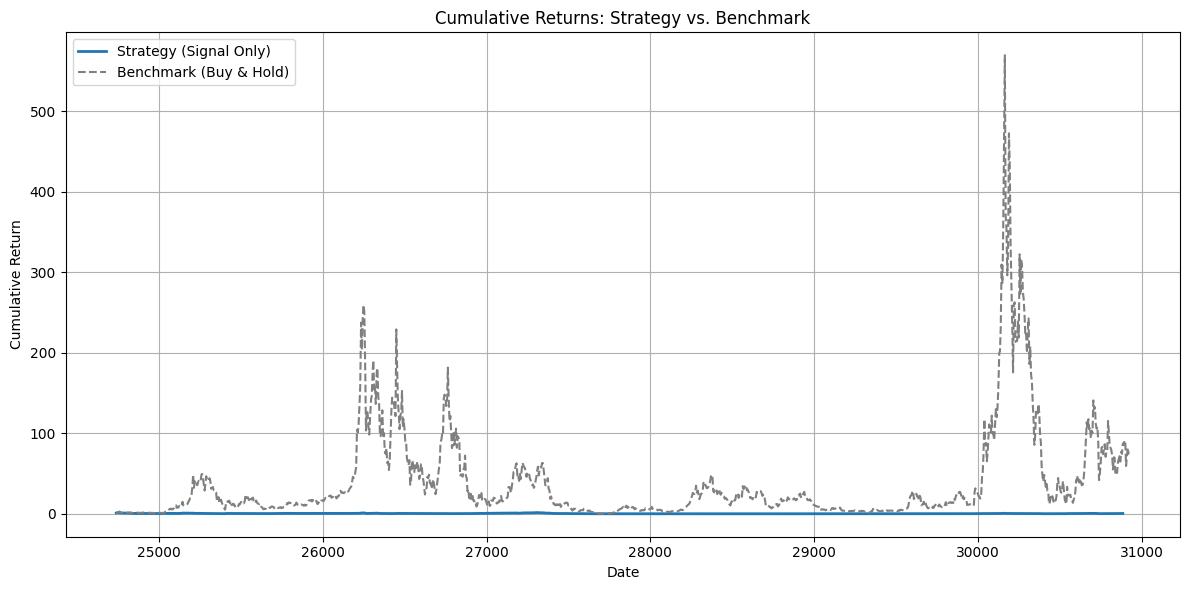

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'future_returns' and 'test_signals' are aligned with y_test
# We assume you already have:
# - future_returns: forward 5-day return for each sample
# - test_signals: Boolean array where model signal is active (e.g., prob > 0.6)

# Strategy returns: only take returns where signal is active
strategy_returns = future_returns[test_signals]

# Benchmark returns: all forward returns regardless of signal
benchmark_returns = future_returns

# Convert to cumulative returns
cumulative_strategy = (1 + strategy_returns.fillna(0)).cumprod()
cumulative_benchmark = (1 + benchmark_returns.fillna(0)).cumprod()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(cumulative_strategy.index, cumulative_strategy, label='Strategy (Signal Only)', linewidth=2)
plt.plot(cumulative_benchmark.index, cumulative_benchmark, label='Benchmark (Buy & Hold)', linestyle='--', color='gray')
plt.title('Cumulative Returns: Strategy vs. Benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

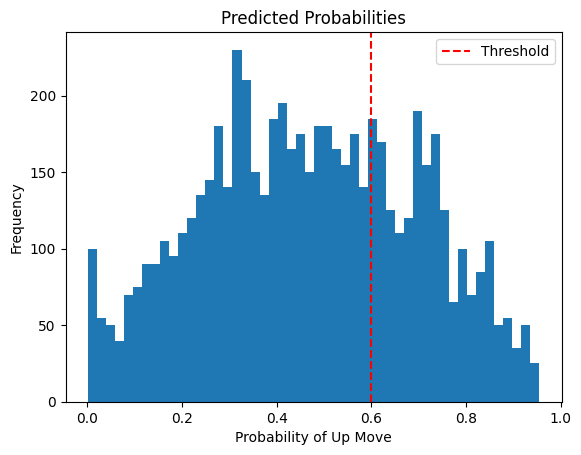

In [31]:
import matplotlib.pyplot as plt

plt.hist(proba, bins=50)
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.title('Predicted Probabilities')
plt.xlabel('Probability of Up Move')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [32]:
print("Future returns length:", len(future_returns))
print("Test signals length:", len(test_signals))
print("Signals true count:", test_signals.sum())
print("Future returns NaNs count:", future_returns.isna().sum())

Future returns length: 6185
Test signals length: 6185
Signals true count: 1915
Future returns NaNs count: 5


In [33]:
signal_returns = future_returns[test_signals]

print(signal_returns.describe())

count    1915.000000
mean        0.000526
std         0.044897
min        -0.154262
25%        -0.025026
50%         0.000822
75%         0.022657
max         0.226900
Name: Close, dtype: float64


In [34]:
print(future_returns.describe())

count    6180.000000
mean        0.001493
std         0.039945
min        -0.210628
25%        -0.020491
50%         0.001464
75%         0.022245
max         0.226900
Name: Close, dtype: float64
